**Chapter 2 – End-to-end Machine Learning project**

*This notebook contains all the sample code and solutions to the exercises in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [5]:
print("Welcome to Machine Learning Assignment 1!")

Welcome to Machine Learning Assignment 1!


This project requires Python 3.7 or above:

In [6]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [7]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Problem framing

The used car catalog data can be found in: https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog
I have been curious about what are the factors of the car (odometer value, manufacturer, engine capacity and so on) that determine the used car prices on online websites, and also the factors except for the car itself that are correlated to higher used car prices: the photos attached on the webste, up/like number, and so on.
Performing the regression regarding the used car prices and the factors help me identify the common pattern in the factors impacting the used car prices, and help me in making informed decisions regarding buying a used car in Canada.

# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

In [1006]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import requests

def load_cars_data():
    file_path = Path("datasets/cars.csv")
    if not file_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/achen77-cell/data/main/cars.csv"
        r = requests.get(url, allow_redirects=True)
        with open('datasets/cars.csv','wb') as file1:
            file1.write(r.content) 
    return pd.read_csv("datasets/cars.csv")

cars = load_cars_data()

## Take a Quick Look at the Data Structure

In [340]:
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [341]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [342]:
cars["manufacturer_name"].value_counts()


Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [653]:
cars["manufacturer_name"].unique()

array(['Renault', 'BMW', 'Volkswagen', 'Mazda', 'Ford', 'Dodge', 'Opel',
       'Mercedes-Benz', 'ВАЗ', 'Audi', 'Peugeot', 'Citroen', 'Fiat',
       'Nissan', 'Mitsubishi', 'Hyundai', 'Subaru', 'Toyota', 'Skoda',
       'Suzuki', 'Volvo', 'Honda', 'Chrysler', 'Land Rover', 'Mini',
       'Chevrolet', 'Iveco', 'Lancia', 'ГАЗ', 'Infiniti', 'Seat', 'Lexus',
       'LADA', 'Jaguar', 'Rover', 'Jeep', 'Daewoo', 'Kia', 'Saab',
       'Geely', 'Dacia', 'ЗАЗ', 'SsangYong', 'Cadillac', 'Acura', 'УАЗ',
       'Alfa Romeo', 'Porsche', 'Buick', 'Pontiac', 'Москвич',
       'Great Wall', 'Lifan', 'Chery', 'Lincoln'], dtype=object)

In [343]:
pd.set_option("display.max_rows", None)
cars["model_name"].value_counts()


Passat                1423
Astra                  751
Golf                   707
A6                     687
Mondeo                 637
Vectra                 565
Laguna                 548
A4                     505
406                    415
Omega                  387
Focus                  380
Megane                 377
100                    371
Octavia                367
Zafira                 356
Xantia                 355
525                    354
Primera                346
Scenic                 323
626                    321
C5                     316
80                     304
Transit                301
X5                     297
Civic                  289
520                    288
6                      269
Rapid                  242
Accord                 237
Jetta                  237
320                    234
323                    233
Santa Fe               226
Sprinter               225
T4                     203
Touran                 200
Escort                 193
A

In [654]:
cars["model_name"].unique()
#to drop because the model is unique even to single instances

array(['Laguna', '518', 'Golf', 'Megane', '5', 'Fiesta', 'Neon', 'Mondeo',
       'Sandero', 'Vectra', 'C240', '2109', '100', '406', 'Xsara', '525',
       '323', 'Astra', 'Stilo', '80', 'Primera', 'Passat', 'Lancer',
       'Elantra', '530', '6', 'Legacy', 'Escort', 'Land Cruiser',
       'Scirocco', 'X-Trail', 'A150', 'T4', 'Xsara Picasso', '626',
       'Terrano', 'Fusion', 'A6', 'Roomster', 'Touran', 'Fabia', '745',
       'Swift', 'Focus', 'Omega', 'CX-7', 'XC90', 'Sprinter', 'Corolla',
       'Q7', 'Insight', '520', 'B200', '207', 'C4 Grand Picasso',
       'Scenic', 'Partner Tepee', '320', '318', 'Avensis', '806', 'C5',
       'T5', 'CLA45 AMG', '730', 'S220', 'Range Rover Sport', '116',
       'Vaneo', 'Espace', 'Town&Country', 'Viano', 'Voyager', 'Corsa',
       'Zafira', 'Caravan', 'Cooper', 'Kangoo', '2114', 'V70', 'Jumpy',
       'Spark', '607', 'X5', 'Frontera', 'Matrix', 'Daily', 'Vito', 'A3',
       'Lybra', 'Scorpio', 'Passat CC', 'Corolla Verso', 'Galant',
       'Yari

In [344]:
cars["transmission"].value_counts()

mechanical    25633
automatic     12898
Name: transmission, dtype: int64

In [345]:
cars["color"].value_counts()

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64

In [347]:
cars["engine_fuel"].value_counts()

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64

In [348]:
cars["engine_has_gas"].value_counts()

False    37184
True      1347
Name: engine_has_gas, dtype: int64

In [349]:
cars["engine_type"].value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [350]:
cars["body_type"].value_counts()

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64

In [351]:
cars["has_warranty"].value_counts()

False    38082
True       449
Name: has_warranty, dtype: int64

In [352]:
cars["state"].value_counts()

owned        37723
new            438
emergency      370
Name: state, dtype: int64

In [353]:
cars["drivetrain"].value_counts()

front    27746
rear      5398
all       5387
Name: drivetrain, dtype: int64

In [354]:
cars["is_exchangeable"].value_counts()

False    24945
True     13586
Name: is_exchangeable, dtype: int64

In [355]:
cars["location_region"].value_counts()
#to remove, because we want to know the common pattern in used car prices instead of the location differences in Belarus

Минская обл.        24230
Гомельская обл.      3140
Витебская обл.       3007
Брестская обл.       2991
Могилевская обл.     2678
Гродненская обл.     2485
Name: location_region, dtype: int64

In [356]:
cars["feature_0"].value_counts()

False    29725
True      8806
Name: feature_0, dtype: int64

In [357]:
cars["feature_1"].value_counts()

True     23396
False    15135
Name: feature_1, dtype: int64

In [358]:
cars["feature_2"].value_counts()

False    29907
True      8624
Name: feature_2, dtype: int64

In [359]:
cars["feature_3"].value_counts()

False    27904
True     10627
Name: feature_3, dtype: int64

In [360]:
cars["feature_4"].value_counts()

False    29227
True      9304
Name: feature_4, dtype: int64

In [361]:
cars["feature_5"].value_counts()

False    24811
True     13720
Name: feature_5, dtype: int64

In [362]:
cars["feature_6"].value_counts()

False    31943
True      6588
Name: feature_6, dtype: int64

In [363]:
cars["feature_7"].value_counts()

False    28369
True     10162
Name: feature_7, dtype: int64

In [364]:
cars["feature_8"].value_counts()

False    22528
True     16003
Name: feature_8, dtype: int64

In [365]:
cars["feature_9"].value_counts()

True     22325
False    16206
Name: feature_9, dtype: int64

In [366]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [837]:
cars.drop(['model_name','location_region','manufacturer_name','engine_has_gas','engine_type'], 
          axis=1, inplace=True)
#remove model_name & manufacturer_name for the same of RandomForest model running time
#engine_has_gas AND engine_type have duplicated information with engine_fuel, so we remove the former 2.
#location_region is about the resgions in Belarus, but we are interested in the general patterns in used car price.

In [664]:
cars.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,...,True,False,True,True,False,False,False,False,True,7


The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [838]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "cars_end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

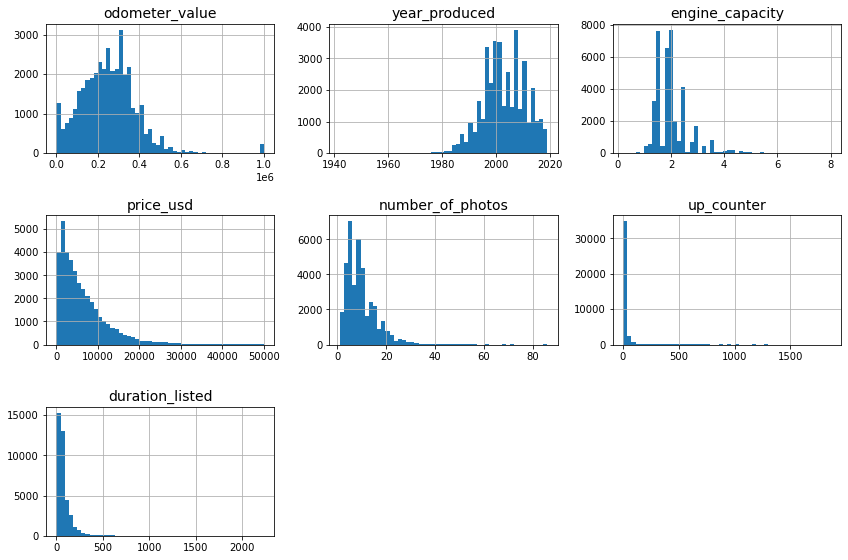

In [839]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cars.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [1007]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [1008]:
train_set, test_set = shuffle_and_split_data(cars, 0.2)
len(train_set)

30825

In [842]:
len(test_set)

7706

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [1009]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

In [1010]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column] #column of id
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [1011]:
cars_with_id = cars.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(cars_with_id, 0.2, "index")

In [1012]:
cars_with_id["id"] = cars["odometer_value"]*10000 + cars["year_produced"] #make an id column of combing longi+lati
train_set, test_set = split_data_with_id_hash(cars_with_id, 0.2, "id")

In [1013]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

In [1014]:
test_set["price_usd"].isnull().sum()

0

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [849]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929913


If you prefer simulations over maths, here's how you could get roughly the same result:

In [850]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [851]:
cars["odometer_value"]

0         190000
1         290000
2         402000
3          10000
4         280000
5         132449
6         318280
7         350000
8         179000
9         571317
10        280000
11        256000
12        321000
13         49999
14        154685
15        163219
16        318650
17        191000
18        179000
19        159000
20        257495
21        241402
22        188000
23        240000
24        249448
25        250000
26        417000
27        377000
28        300000
29        270000
30        444444
31        299000
32        340000
33        123456
34        118000
35        246113
36        128748
37        100000
38        342790
39        390000
40        215000
41        288500
42        225000
43        310000
44        121000
45        242000
46           286
47        209000
48        195000
49        126705
50        164153
51        143000
52        463491
53        321869
54        250000
55        260000
56        300000
57        358047
58        2960

In [852]:
cars["odometer_cat"] = pd.cut(cars["odometer_value"],
                               bins=[-0.1, 158000, 250000, 325000, np.inf], 
                               labels=[1, 2, 3, 4])
#cut could convert ages to groups of ranges. 
#Supports binning into an equal number of bins, or a pre-specified array of bins.

The bin is set up according to the quartile ranges. 
The lowest bin set to -0.1, as the minimum value is 0, otherwise Python would return 438 NaN values which blocks the stratifying process.

In [853]:
cars["odometer_value"].isnull().sum()

0

In [854]:
cars["odometer_cat"].isnull().sum() #assign the range that the record's column value falls 

0

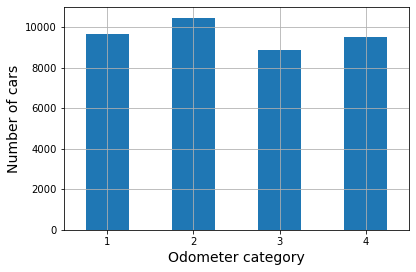

In [855]:
cars["odometer_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Odometer category")
plt.ylabel("Number of cars")
save_fig("Odometer_cat_bar_plot")  # extra code
plt.show()

In [856]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cars, cars["odometer_cat"]):
    strat_train_set_n = cars.iloc[train_index]
    strat_test_set_n = cars.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [857]:
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

In [858]:
y

array([0, 0, 0, 1, 1, 1])

In [859]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [860]:
strat_train_set, strat_test_set = train_test_split(
    cars, test_size=0.2, stratify=cars["odometer_cat"], random_state=42)

In [861]:
strat_test_set["odometer_cat"].value_counts() / len(strat_test_set)

2    0.271571
1    0.250811
4    0.247437
3    0.230180
Name: odometer_cat, dtype: float64

The category of odometer is so much balanced in the stratefied samples.

In [862]:
# extra code – computes the data for Figure 2–10

def odometer_cat_proportions(data):
    return data["odometer_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": odometer_cat_proportions(cars),
    "Stratified %": odometer_cat_proportions(strat_test_set),
    "Random %": odometer_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Odometer Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Odometer Category,,,,,
1,25.08,25.08,24.32,-0.00,-3.05
2,27.15,27.16,27.21,0.01,0.20
3,23.03,23.02,23.36,-0.03,1.43
4,24.74,24.74,25.12,0.02,1.54


In [863]:
#for set_ in (strat_train_set, strat_test_set):
#    set_.drop("odometer_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights with focus of the price

In [864]:
cars = strat_train_set.copy()

In [945]:
cars.shape

(27996, 25)

## Visualizing Geographical Data

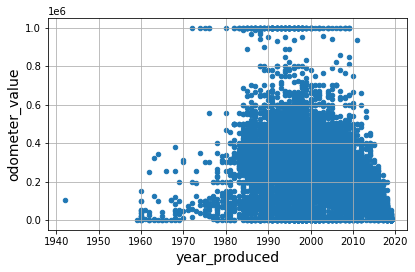

In [865]:
cars.plot(kind="scatter", x="year_produced", y="odometer_value", grid=True)
save_fig("year_odo_initial_visualization_plot")  # extra code
plt.show()

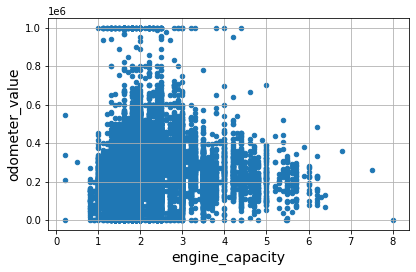

In [866]:
cars.plot(kind="scatter", x="engine_capacity", y="odometer_value", grid=True)
save_fig("engine_odo_initial_visualization_plot")  # extra code
plt.show()

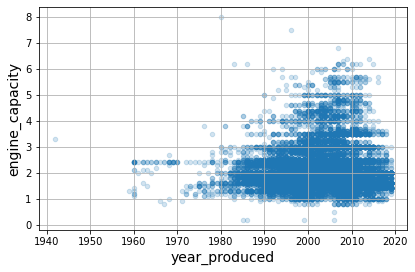

In [867]:
cars.plot(kind="scatter", x="year_produced", y="engine_capacity", grid=True, alpha=0.2)
save_fig("year_capacity_initial_visualization_plot")  # extra code
plt.show()

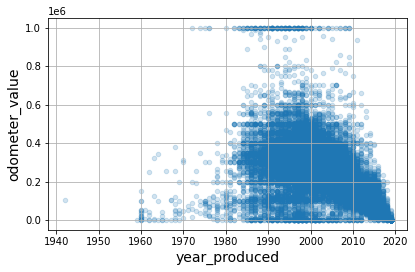

In [868]:
cars.plot(kind="scatter", x="year_produced", y="odometer_value", grid=True, alpha=0.2)
save_fig("year_odo_better_visualization_plot")  # extra code
plt.show()

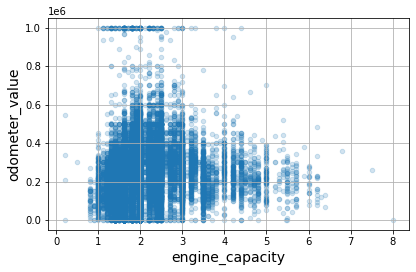

In [869]:
cars.plot(kind="scatter", x="engine_capacity", y="odometer_value", grid=True, alpha=0.2)
save_fig("engine_odo_better_visualization_plot")  # extra code
plt.show()

Visualization regarding the price behavior regarding the used car features:

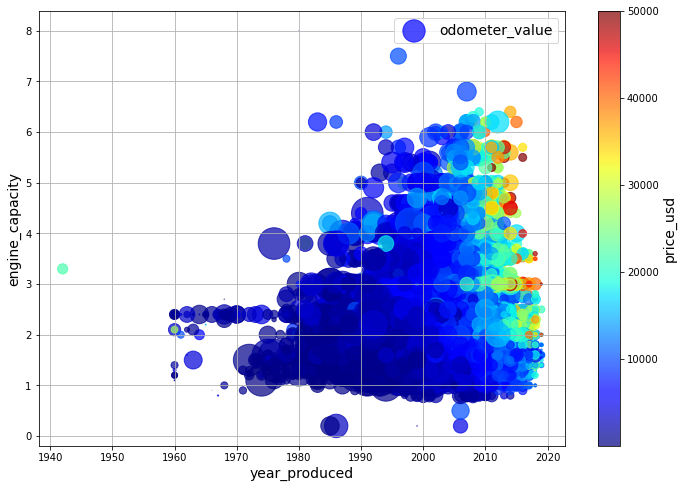

In [870]:
cars.plot(kind="scatter", x="year_produced", y="engine_capacity", grid=True, alpha=0.7,
             s=cars["odometer_value"]/1000, label="odometer_value",
             c="price_usd", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("used_car_prices_scatterplot")  # extra code
plt.show()



Findings:

1. The cars produced in more recent years have higher price, while the cars produced in early years have lower prices.

2. Cars produced in more recent years have relatively lower odometer_value (traveling distance).

3. Some cars produced in early years have notably larger engine capacity, which has higher resale value which makes them active in market.

4. Most cars are produced after 1990; most cars have lower engine capacity (<4).

Visualization regarding the price behavior with online behavior number of photos, up_counter (similar to get liked).

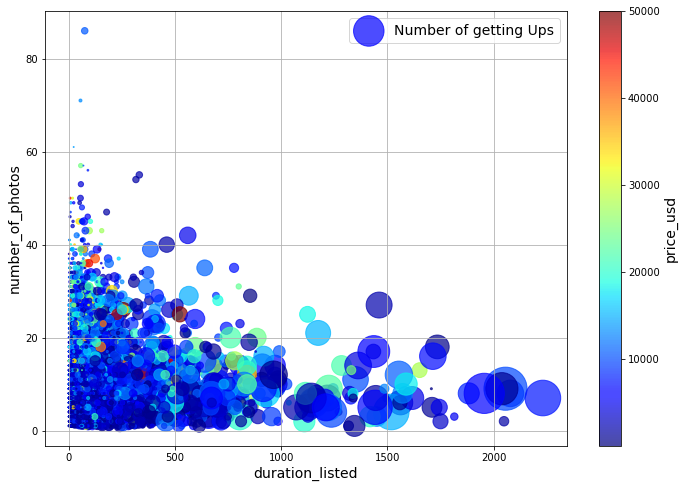

In [871]:
cars.plot(kind="scatter", x="duration_listed", y="number_of_photos", grid=True, alpha=0.7,
             s=cars["up_counter"], label="Number of getting Ups",
             c="price_usd", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("used_car_prices_scatterplot")  # extra code
plt.show()



Findings:

1. The used cars with higher prices tend to have more number of photos, probably because the sellers are keen to provide more information for the deal

2. Those cars with most 'Up's (more popular) are those with lower prices.

3. More liked cars (with more 'Up's) tend to have higher duration for the listing, but longer duration does not always leads to more popularity, nor more photoes does.

## Looking for Correlations

In [1015]:
corr_matrix = cars.corr()

In [1016]:
corr_matrix["price_usd"].sort_values(ascending=False)

price_usd           1.000000
year_produced       0.705511
feature_7           0.498547
feature_3           0.470929
feature_6           0.451714
feature_8           0.449131
feature_5           0.434471
feature_2           0.338166
feature_4           0.336143
number_of_photos    0.316859
engine_capacity     0.296597
has_warranty        0.285532
feature_9           0.266156
feature_1           0.255806
up_counter          0.057382
duration_listed     0.033524
is_exchangeable    -0.000503
engine_has_gas     -0.062528
feature_0          -0.223896
odometer_value     -0.421204
Name: price_usd, dtype: float64

For the correlations, we only take those variables that are known at the moment of users submitted their quote for the used car, which means the variables that might change over time on the catalog website (up_counter, duration_listed, number_of_photos) would not be considered.

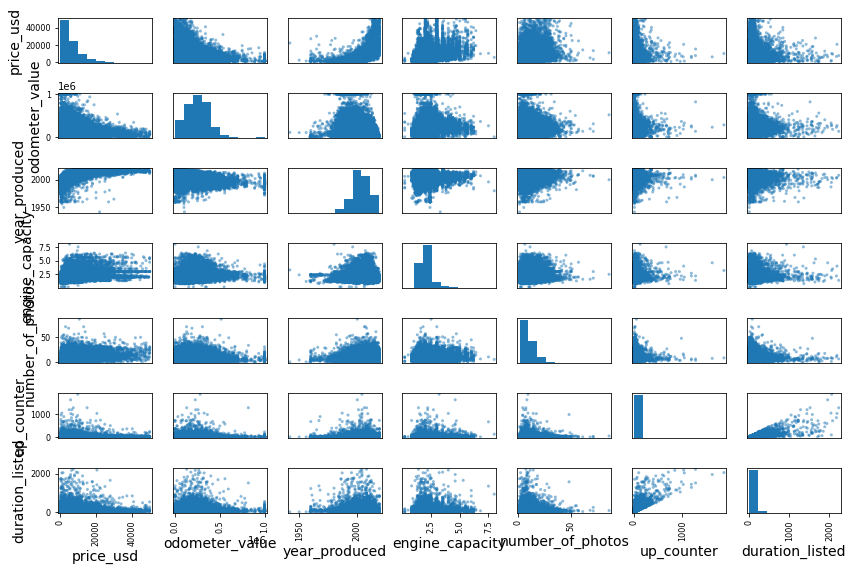

In [1017]:
from pandas.plotting import scatter_matrix

attributes = ["price_usd", "odometer_value", "year_produced",
              "engine_capacity","number_of_photos","up_counter","duration_listed"]
scatter_matrix(cars[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

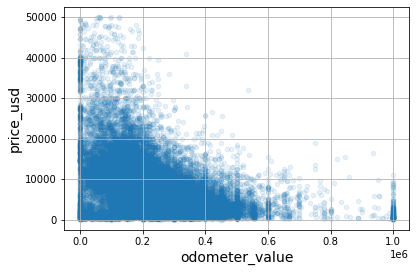

In [1018]:
cars.plot(kind="scatter", x="odometer_value", y="price_usd",
             alpha=0.1, grid=True)
save_fig("odometer_vs_car_price_scatterplot")  # extra code
plt.show()

We know that usually the more traveling distance, the lower the used car price.

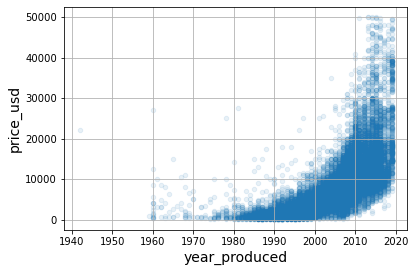

In [876]:
cars.plot(kind="scatter", x="year_produced", y="price_usd",
             alpha=0.1, grid=True)
save_fig("year_produced_vs_car_price_scatterplot")  # extra code
plt.show()

We know that usually the later the car was produced (newer cars), the higher the used car price.

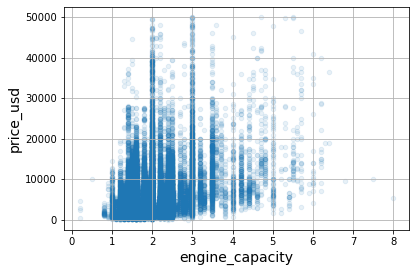

In [877]:
cars.plot(kind="scatter", x="engine_capacity", y="price_usd",
             alpha=0.1, grid=True)
save_fig("engine_capacity_vs_car_price_scatterplot")  # extra code
plt.show()

It is hard to say there is a significant relationship between the engine capcity and the used car price. However, most of the cars have engine capacity lower than 3.5.It could be that those used cars with higher engine_capacity are usually produced in earlier years (older versions) and with more odometer value, and those 2 factors drive down the prices.

## Experimenting with Attribute Combinations

Create a new column ('yearly_odo') for the average odometer value per year produced to reflect the usability of the used car, whether it is heavily used measured by the yearly odometer value or not.

In [878]:
cars['age'] = 2020 - cars['year_produced']
cars['yearly_odo']=cars['odometer_value']/cars['age']

In [710]:
cars.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,odometer_cat,age,yearly_odo
11616,Ford,automatic,other,140000,2010,gasoline,False,gasoline,1.6,hatchback,...,False,True,False,True,True,True,88,1,10,14000.000000
1600,Kia,mechanical,green,250000,1997,gasoline,False,gasoline,1.8,sedan,...,False,False,False,False,False,False,72,2,23,10869.565217
11759,Ford,mechanical,black,11350,2006,gasoline,False,gasoline,2.0,minivan,...,True,True,False,False,True,True,80,1,14,810.714286
30047,BMW,mechanical,silver,320000,1999,gasoline,False,gasoline,1.9,sedan,...,False,False,False,False,True,True,178,3,21,15238.095238
3785,Opel,automatic,white,300000,2000,gas,True,gasoline,2.0,sedan,...,False,False,False,False,False,False,61,3,20,15000.000000


In [879]:
corr_matrix = cars.corr()
corr_matrix["price_usd"].sort_values(ascending=False)

price_usd           1.000000
year_produced       0.705888
feature_7           0.499057
feature_3           0.471771
feature_6           0.453046
feature_8           0.451323
feature_5           0.436463
feature_2           0.342343
feature_4           0.335837
number_of_photos    0.312970
engine_capacity     0.299110
has_warranty        0.283035
feature_9           0.267449
feature_1           0.259400
yearly_odo          0.192237
up_counter          0.054536
duration_listed     0.031096
is_exchangeable    -0.004526
feature_0          -0.226843
odometer_value     -0.421892
age                -0.705888
Name: price_usd, dtype: float64

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [880]:
cars = strat_train_set.drop("price_usd", axis=1) 
cars_labels = strat_train_set["price_usd"].copy() #target variable saved as label

## Data Cleaning

Note: this dataset does not have NaN records as in the data summary section. This part is just for precation.

3 options to handle the NaN values:

```python
cars.dropna(subset=["column_with_na_values"], inplace=True)    # option 1

cars.drop("column_with_na_values", axis=1)       # option 2

median = cars["column_with_na_values"].median()  # option 3
cars["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `cars` and work on that copy to avoid breaking `cars`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [881]:
null_rows_idx = cars.isnull().any(axis=1) #Using isnull() to select all rows with NaN under an entire DataFrame
cars.loc[null_rows_idx].head() #filter on rows that originally contained a NaN value

,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,state,drivetrain,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,odometer_cat
8782,automatic,orange,27000,2013,electric,NaN,hatchback,False,owned,front,...,False,True,True,True,False,True,True,True,77,1
26582,automatic,black,84000,2014,electric,NaN,hatchback,False,owned,front,...,False,False,False,True,True,True,True,True,138,1
9048,automatic,orange,49000,2014,electric,NaN,hatchback,False,owned,front,...,False,True,False,True,False,True,False,True,11,1
29590,automatic,other,67000,2018,electric,NaN,liftback,False,owned,rear,...,True,True,True,True,True,True,True,True,57,1
25943,automatic,white,57357,2015,electric,NaN,hatchback,False,owned,front,...,True,True,True,True,True,True,True,True,75,1


In [882]:
null_rows_idx = cars.isnull().any(axis=1)
null_rows_idx

11616    False
1600     False
11759    False
30047    False
3785     False
36714    False
3320     False
34911    False
13652    False
16886    False
4593     False
14268    False
13108    False
26123    False
22548    False
7451     False
10589    False
1836     False
35132    False
7567     False
16457    False
25853    False
23480    False
25317    False
29153    False
7322     False
16358    False
4871     False
29539    False
28325    False
24112    False
6555     False
37423    False
10657    False
21843    False
12699    False
2261     False
11476    False
25825    False
14701    False
19034    False
24185    False
17297    False
33360    False
35399    False
35835    False
21790    False
20024    False
27007    False
35136    False
21871    False
23543    False
9397     False
34317    False
12330    False
16982    False
20156    False
29986    False
31847    False
14371    False
34245    False
34944    False
31215    False
34587    False
9356     False
37435    False
12796    F

In [284]:
#cars_option1 = cars.copy()

#cars_option1.dropna(subset=["column_with_na_values"], inplace=True)  # option 1

#cars_option1.loc[null_rows_idx].head()

In [285]:
#cars_option2 = cars.copy()

#cars_option2.drop("column_with_na_values", axis=1, inplace=True)  # option 2

#cars_option2.loc[null_rows_idx].head()

In [286]:
#cars_option3 = cars.copy()

#median = cars["column_with_na_values"].median()
#cars_option3["column_with_na_values"].fillna(median, inplace=True)  # option 3

#cars_option3.loc[null_rows_idx].head()

In [883]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [884]:
cars_num = cars.select_dtypes(include=[np.number]) 
#Return a subset of the DataFrame’s columns based on the column dtypes.

In [885]:
imputer.fit(cars_num)

SimpleImputer(strategy='median')

In [886]:
imputer.statistics_ #The imputation fill value for each feature. 

array([2.500e+05, 2.003e+03, 2.000e+00, 8.000e+00, 5.000e+00, 5.900e+01])

Check that this is the same as manually computing the median of each attribute:

In [887]:
cars_num.median().values

array([2.500e+05, 2.003e+03, 2.000e+00, 8.000e+00, 5.000e+00, 5.900e+01])

Transform the training set:

In [888]:
X = imputer.transform(cars_num)

In [889]:
imputer.feature_names_in_

array(['odometer_value', 'year_produced', 'engine_capacity',
       'number_of_photos', 'up_counter', 'duration_listed'], dtype=object)

In [890]:
cars_tr = pd.DataFrame(X, columns=cars_num.columns,
                          index=cars_num.index)

In [891]:
cars_num.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed
11616,140000,2010,1.6,6,6,88
1600,250000,1997,1.8,5,1,72
11759,11350,2006,2.0,12,3,80
30047,320000,1999,1.9,18,9,178
3785,300000,2000,2.0,2,2,61


In [892]:
cars_tr.loc[null_rows_idx].head()

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed
8782,27000.0,2013.0,2.0,11.0,13.0,77.0
26582,84000.0,2014.0,2.0,12.0,19.0,138.0
9048,49000.0,2014.0,2.0,18.0,1.0,11.0
29590,67000.0,2018.0,2.0,6.0,2.0,57.0
25943,57357.0,2015.0,2.0,20.0,57.0,75.0


In [893]:
imputer.strategy

'median'

In [894]:
cars_tr = pd.DataFrame(X, columns=cars_num.columns, 
                          index=cars_num.index)
#Transformed numerical variables

In [895]:
cars_tr.loc[null_rows_idx].head()  # not shown in the book

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed
8782,27000.0,2013.0,2.0,11.0,13.0,77.0
26582,84000.0,2014.0,2.0,12.0,19.0,138.0
9048,49000.0,2014.0,2.0,18.0,1.0,11.0
29590,67000.0,2018.0,2.0,6.0,2.0,57.0
25943,57357.0,2015.0,2.0,20.0,57.0,75.0


Now let's drop some outliers:

In [896]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [897]:
outlier_pred #identify the predicted outliers

array([1, 1, 1, ..., 1, 1, 1])

Drop outliers with the Isolation Forest prediction result.

In [898]:
cars= cars.iloc[outlier_pred == 1]
cars_labels = cars_labels.iloc[outlier_pred == 1]

In [899]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27996 entries, 11616 to 16606
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   transmission      27996 non-null  object  
 1   color             27996 non-null  object  
 2   odometer_value    27996 non-null  int64   
 3   year_produced     27996 non-null  int64   
 4   engine_fuel       27996 non-null  object  
 5   engine_capacity   27989 non-null  float64 
 6   body_type         27996 non-null  object  
 7   has_warranty      27996 non-null  bool    
 8   state             27996 non-null  object  
 9   drivetrain        27996 non-null  object  
 10  is_exchangeable   27996 non-null  bool    
 11  number_of_photos  27996 non-null  int64   
 12  up_counter        27996 non-null  int64   
 13  feature_0         27996 non-null  bool    
 14  feature_1         27996 non-null  bool    
 15  feature_2         27996 non-null  bool    
 16  feature_3         

In [900]:
cars_labels.info()

<class 'pandas.core.series.Series'>
Int64Index: 27996 entries, 11616 to 16606
Series name: price_usd
Non-Null Count  Dtype  
--------------  -----  
27996 non-null  float64
dtypes: float64(1)
memory usage: 437.4 KB


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [901]:
cars_cat_body = cars[["body_type"]]
cars_cat_body.head(8)

,body_type
11616,hatchback
1600,sedan
11759,minivan
30047,sedan
3785,sedan
36714,universal
3320,minibus
34911,minibus


In [902]:
cars_cat_body.value_counts()

body_type
sedan        9378
hatchback    5732
universal    4163
suv          3448
minivan      2734
minibus      1008
van           558
coupe         444
liftback      419
pickup         66
cabriolet      41
limousine       5
dtype: int64

In [903]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cars_cat_body_encoded = ordinal_encoder.fit_transform(cars_cat_body)

In [904]:
cars_cat_body_encoded[:8]

array([[ 2.],
       [ 8.],
       [ 6.],
       [ 8.],
       [ 8.],
       [10.],
       [ 5.],
       [ 5.]])

In [905]:
ordinal_encoder.categories_

[array(['cabriolet', 'coupe', 'hatchback', 'liftback', 'limousine',
        'minibus', 'minivan', 'pickup', 'sedan', 'suv', 'universal', 'van'],
       dtype=object)]

In [906]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cars_cat_body_1hot = cat_encoder.fit_transform(cars_cat_body)

In [907]:
cars_cat_body_1hot

<27996x12 sparse matrix of type '<class 'numpy.float64'>'
	with 27996 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [908]:
cars_cat_body_1hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [909]:
cat_encoder = OneHotEncoder(sparse=False) #to make the sparse array False so we get a dense array
cars_cat_body_1hot = cat_encoder.fit_transform(cars_cat_body)
cars_cat_body_1hot

/Users/alicia/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [910]:
cat_encoder.categories_ 
#The categories of each feature determined during fitting 
#(in order of the features in X and corresponding with the output of transform). 

[array(['cabriolet', 'coupe', 'hatchback', 'liftback', 'limousine',
        'minibus', 'minivan', 'pickup', 'sedan', 'suv', 'universal', 'van'],
       dtype=object)]

In [911]:
df_test = pd.DataFrame({"body_type": ["coupe", "sedan","minivan","van","minibus","suv","cabriolet"]})
#['cabriolet', 'coupe', 'hatchback', 'liftback', 'limousine',
#        'minibus', 'minivan', 'pickup', 'sedan', 'suv', 'universal', 'van'],
#       dtype=object)
#df_test
pd.get_dummies(df_test)

,body_type_cabriolet,body_type_coupe,body_type_minibus,body_type_minivan,body_type_sedan,body_type_suv,body_type_van
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0


In [912]:
cat_encoder.transform(df_test) 
#one-hot returns the number of dummified categorical columns with the same value of the categorical value count

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [913]:
df_test_unknown = pd.DataFrame({"body_type": ["UNKNOWN","coupe", "sedan","minivan","van","minibus","suv","cabriolet"]})
pd.get_dummies(df_test_unknown)

,body_type_UNKNOWN,body_type_cabriolet,body_type_coupe,body_type_minibus,body_type_minivan,body_type_sedan,body_type_suv,body_type_van
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0


In [914]:
cat_encoder.handle_unknown = "ignore" #otherwise the unknown categories would report error
cat_encoder.transform(df_test_unknown) #the first record not among the categories and thus 0, 
#The first instance is UNKNOWN and it is 1 in no one-hot dummified columns.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [915]:
cat_encoder.feature_names_in_

array(['body_type'], dtype=object)

In [916]:
cat_encoder.get_feature_names_out() 
#Get output feature names for transformation
#Arranged alphabetically

array(['body_type_cabriolet', 'body_type_coupe', 'body_type_hatchback',
       'body_type_liftback', 'body_type_limousine', 'body_type_minibus',
       'body_type_minivan', 'body_type_pickup', 'body_type_sedan',
       'body_type_suv', 'body_type_universal', 'body_type_van'],
      dtype=object)

In [917]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
#make a dataframe of the encoded result with the feature names out as the columns

In [918]:
df_output

,body_type_cabriolet,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [919]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) #feature_range is the desired range of transformed data
cars_num_min_max_scaled = min_max_scaler.fit_transform(cars_num)

In [920]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cars_num_std_scaled = std_scaler.fit_transform(cars_num)

In [921]:
cars["odometer_value"].max()

999999

Show the log operation transforms the distribution of the odometer_value attribute.

/Users/alicia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


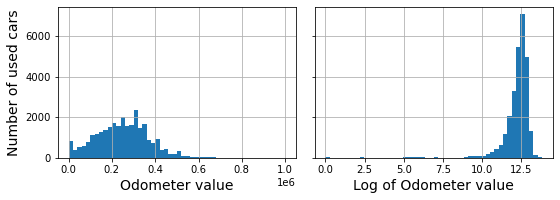

In [922]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3),sharey=True) # 1 is nrows, 2 is ncolomns 
cars["odometer_value"].hist(ax=axs[0], bins=50)
df_odometer_log=np.log(cars["odometer_value"])
plt.hist(df_odometer_log[np.isfinite(df_odometer_log)].values, bins=50)
plt.grid(visible=True)
#cars["odometer_value"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Odometer value")
axs[1].set_xlabel("Log of Odometer value")
axs[0].set_ylabel("Number of used cars")
save_fig("long_tail_plot_for_odometeter_value")
plt.show()

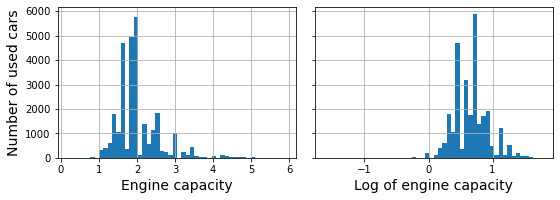

In [925]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3),sharey=True) # 1 is nrows, 2 is ncolomns 
cars["engine_capacity"].hist(ax=axs[0], bins=50)
df_engine_log=np.log(cars["engine_capacity"])
plt.hist(df_engine_log[np.isfinite(df_engine_log)].values, bins=50)
plt.grid(visible=True)
#cars["odometer_value"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Engine capacity")
axs[1].set_xlabel("Log of engine capacity")
axs[0].set_ylabel("Number of used cars")
save_fig("long_tail_plot_for_engine_capacity_value")
plt.show()

It seems that the log transofmration makes odometer_value more normally distributed

In [927]:
cars['engine_capacity'].mean()

2.0034156275680277

In [928]:
from sklearn.metrics.pairwise import rbf_kernel #Compute the rbf (gaussian) kernel between X and Y.

engine_cap_simil_2 = rbf_kernel(np.isfinite(cars[["engine_capacity"]]), [[2]], gamma=0.1)

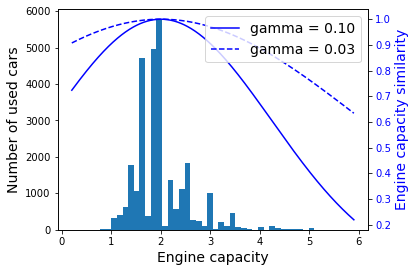

In [929]:
# extra code – for rbf kernal on engine capacity

engine_caps = np.linspace(cars["engine_capacity"].min(),
                   cars["engine_capacity"].max(), 500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(engine_caps, [[2]], gamma=gamma1)
rbf2 = rbf_kernel(engine_caps, [[2]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Engine capacity")
ax1.set_ylabel("Number of used cars")
ax1.hist(cars["engine_capacity"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(engine_caps, rbf1, color=color, label="gamma = 0.10")
ax2.plot(engine_caps, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Engine capacity similarity", color=color)

plt.legend(loc="upper right")
save_fig("Engine_capacity_similarity_plot")
plt.show()

In [930]:
cars[["odometer_value"]].iloc[:5]

,odometer_value
11616,140000
1600,250000
11759,11350
30047,320000
3785,300000


In [931]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(cars_labels.to_frame()) #housing label is the median price - y

model = LinearRegression()
model.fit(cars[["odometer_value"]], scaled_labels) #fit the linear model
some_new_data = cars[["odometer_value"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions) 
##inverse transform is equal to the later Transformed target regressor
#Inverse transform to scale back the data to the original representation.


In [932]:
predictions

array([[ 8644.51236331],
       [ 6236.89138728],
       [11460.33453209],
       [ 4704.76894799],
       [ 5142.51821636]])

In [933]:
from sklearn.compose import TransformedTargetRegressor #Meta-estimator to regress on a transformed target.

model = TransformedTargetRegressor(LinearRegression(), #The by-default regressor
                                   transformer=StandardScaler())
model.fit(cars[["odometer_value"]], cars_labels) #fit X and y to predict on the pretended new data
predictions = model.predict(some_new_data)

In [934]:
predictions

array([ 8644.51236331,  6236.89138728, 11460.33453209,  4704.76894799,
        5142.51821636])

## Custom Transformers

To create simple transformers:

In [935]:
#transform the population with log because it is long-tailed - from the histogram depicted in 'Feature Scaling'
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) 
#np log is the transform function, 
#inverse_func is optional if you plan to use your transformer in a TransformedTargetRegressor
log_pop = log_transformer.transform(cars[["odometer_value"]])

/Users/alicia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [936]:
rbf_transformer = FunctionTransformer(rbf_kernel, #Computes the same Gaussian RBF similarity measures
                                      kw_args=dict(Y=[[2.]], gamma=0.1)) 
                                    #Dictionary of additional keyword arguments to pass to func.
engine_cap_simil_2 = rbf_transformer.transform(np.isfinite(cars[["engine_capacity"]]))

In [937]:
engine_cap_simil_2

array([[0.90483742],
       [0.90483742],
       [0.90483742],
       ...,
       [0.90483742],
       [0.90483742],
       [0.90483742]])

In [938]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [939]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
#sklearn.utils.validation contains several functions we can use to validate the inputs. 
#We can skip in this book but production code should have them

#the custom transformer that acts like StandardScalar
class StandardScalerClone(BaseEstimator, TransformerMixin):
    #Base class for all estimators in scikit-learn.
        #Mixin class for all transformers in scikit-learn.
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit() #X number of columns
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    #In Python, assertions are statements that you can use to set sanity checks during the development process. Assertions allow you to test the correctness of your code by checking if some specific conditions remain true, 
    #which can come in handy while you're debugging code.

In [940]:
# use other esetimator of KMeans to identify the main clusters in the training data and
#then use rbf_kernal() and transform() to measure how similar each sample is to each cluster center
from sklearn.cluster import KMeans
#Base class for all estimators in scikit-learn.
class ClusterSimilarity(BaseEstimator, TransformerMixin): 

    def __init__(self, n_clusters=10, gamma=1.0, random_state=None): #init_method
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None): #fit method
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X): #transform method
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [941]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(np.isfinite(cars[["odometer_value", "engine_capacity"]]),
                                           sample_weight=cars_labels)

/Users/alicia/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/g9/dqhs66rn2jg8y6k458n9r11m0000gn/T/ipykernel_946/2356903799.py:14: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self.kmeans_.fit(X, sample_weight=sample_weight)


In [942]:
similarities[:3].round(2)

array([[1.  , 0.37, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.  , 0.37, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.  , 0.37, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

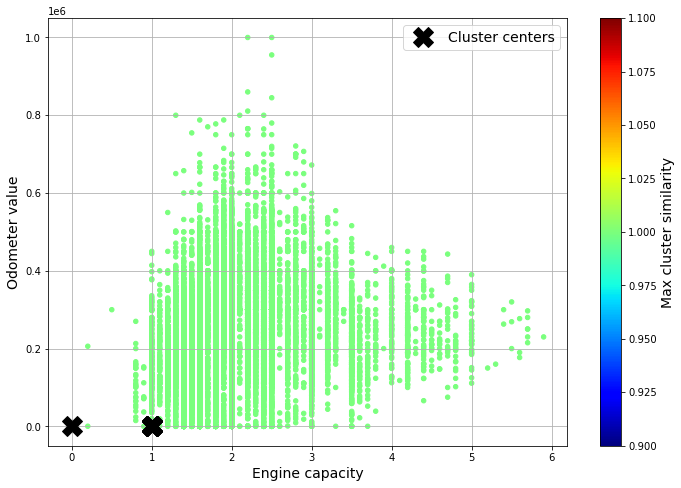

In [943]:
# extra code – this cell generates Figure 2–19

cars_renamed = cars.rename(columns={
    "odometer_value": "Odometer value", "engine_capacity": "Engine capacity",
    "year_produced": "Year produced"})

cars_finite=cars_renamed[np.isfinite(cars_renamed[["Odometer value", "Engine capacity","Year produced"]])]

cars_finite["Max cluster similarity"] = similarities.max(axis=1)

cars_finite.plot(kind="scatter", x="Engine capacity", y="Odometer value", grid=True,
                     #s=cars_labels["price_usd"], label="price_usd",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1], #engine_capacity
         cluster_simil.kmeans_.cluster_centers_[:, 0], #odometer_value
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("Used_cars_cluster_plot")
plt.show()




It does not seem to derive any insights for the clustering.

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [779]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [944]:
cars.shape

(27996, 25)

In [946]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [947]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [948]:
cars_num_prepared = num_pipeline.fit_transform(cars_num)
cars_num_prepared[:2].round(2)

array([[-0.8 ,  0.87, -0.68, -0.6 , -0.24,  0.07],
       [ 0.01, -0.74, -0.38, -0.76, -0.35, -0.07]])

In [949]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out
#hasattr(object, attribute): if the object has certain attribute
    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out #if not imputed, make the imputer with attributes

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [950]:
df_cars_num_prepared = pd.DataFrame(
    cars_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=cars_num.index)

In [951]:
df_cars_num_prepared.head(2)  # extra code

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed
11616,-0.799892,0.873388,-0.680176,-0.599098,-0.235843,0.070233
1600,0.007882,-0.738265,-0.380019,-0.763679,-0.351635,-0.074612


In [952]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [953]:
num_pipeline[1]

StandardScaler()

In [954]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [955]:
num_pipeline.named_steps["simpleimputer"]
#would return an instance of the SimpleImputer transformer that is present in the "num_pipeline" pipeline. 

SimpleImputer(strategy='median')

In [956]:
num_pipeline.set_params(simpleimputer__strategy="median")
#set the strategy parameter of the SimpleImputer transformer, 
#which is present in the "num_pipeline" pipeline, to "median".

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [957]:
from sklearn.compose import ColumnTransformer

num_attribs = ["odometer_value", "year_produced", "engine_capacity"]
#please note that we only take those attributes that we know when we submit to the catalog into consideration 

cat_attribs = ["body_type","engine_fuel","manufacturer_name","color","transmission",
              "feature_0","feature_1","feature_2","feature_3","feature_4","feature_5",
              "feature_6","feature_7","feature_8","feature_9",
              "has_warrenty", "state","drivetrain","is_exchangeable"]
           
#some categoricals are duplicating information, such as engine_has_gas, engine_type VS engine_fuel. 
#The column engine_fuel contains the most inforamtion

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [958]:
from sklearn.compose import make_column_selector, make_column_transformer
#make_column_selector: Create a callable to select columns to be used with ColumnTransformer.
#make_column_transformer: Applies transformers to columns of an array or pandas DataFrame.

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [959]:
cars_prepared = preprocessing.fit_transform(cars)

In [960]:
preprocessing.get_feature_names_out()

array(['pipeline-1__odometer_value', 'pipeline-1__year_produced',
       'pipeline-1__engine_capacity', 'pipeline-1__number_of_photos',
       'pipeline-1__up_counter', 'pipeline-1__duration_listed',
       'pipeline-2__transmission_automatic',
       'pipeline-2__transmission_mechanical', 'pipeline-2__color_black',
       'pipeline-2__color_blue', 'pipeline-2__color_brown',
       'pipeline-2__color_green', 'pipeline-2__color_grey',
       'pipeline-2__color_orange', 'pipeline-2__color_other',
       'pipeline-2__color_red', 'pipeline-2__color_silver',
       'pipeline-2__color_violet', 'pipeline-2__color_white',
       'pipeline-2__color_yellow', 'pipeline-2__engine_fuel_diesel',
       'pipeline-2__engine_fuel_electric', 'pipeline-2__engine_fuel_gas',
       'pipeline-2__engine_fuel_gasoline',
       'pipeline-2__engine_fuel_hybrid-diesel',
       'pipeline-2__engine_fuel_hybrid-petrol',
       'pipeline-2__body_type_cabriolet', 'pipeline-2__body_type_coupe',
       'pipeline-2__bod

In [961]:
cars_prepared.shape

(27996, 44)

In [962]:
# extra code – shows that we can get a DataFrame out if we want
cars_prepared_fr = pd.DataFrame(
    cars_prepared,
    #columns=preprocessing.get_feature_names_out(),
    index=cars.index)
cars_prepared_fr.head(2)

,0
11616,"(0, 0)\t-0.8919647988694741\n (0, 1)\t0.913..."
1600,"(0, 0)\t0.027592393042721628\n (0, 1)\t-0.7..."


In [999]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

#the age of each car until 2020 
def age_to_2020(X):
    return 2020 - X

def age_name(function_transformer, feature_names_in):
    return ["age"]  # feature names out

def age_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(age_to_2020, feature_names_out=age_name),
        StandardScaler())

#yearly odometer

def odo_pipeline_1(X):
    return (X[:, [0]] / (2020-X[:, [1]]))

def odo_pipeline_2():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(odo_pipeline_1, feature_names_out=ratio_name),
        StandardScaler())


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())


#commented out are the attribute combinations, not able to fix the bugs 
preprocessing = ColumnTransformer([
        ("age_to_2020", age_pipeline(), ["year_produced"]),
        ("yearly_odo", odo_pipeline_2(), ["odometer_value", "year_produced"]),
        #("odo_engine_cluster", cluster_simil, ["odometer_value", "engine_capacity"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [964]:
cars_prepared = preprocessing.fit_transform(cars)
cars_prepared.shape

(27996, 57)

In [965]:
preprocessing.get_feature_names_out()

array(['age_to_2020__age', 'yearly_odo__ratio',
       'cat__transmission_automatic', 'cat__transmission_mechanical',
       'cat__color_black', 'cat__color_blue', 'cat__color_brown',
       'cat__color_green', 'cat__color_grey', 'cat__color_orange',
       'cat__color_other', 'cat__color_red', 'cat__color_silver',
       'cat__color_violet', 'cat__color_white', 'cat__color_yellow',
       'cat__engine_fuel_diesel', 'cat__engine_fuel_electric',
       'cat__engine_fuel_gas', 'cat__engine_fuel_gasoline',
       'cat__engine_fuel_hybrid-diesel', 'cat__engine_fuel_hybrid-petrol',
       'cat__body_type_cabriolet', 'cat__body_type_coupe',
       'cat__body_type_hatchback', 'cat__body_type_liftback',
       'cat__body_type_limousine', 'cat__body_type_minibus',
       'cat__body_type_minivan', 'cat__body_type_pickup',
       'cat__body_type_sedan', 'cat__body_type_suv',
       'cat__body_type_universal', 'cat__body_type_van',
       'cat__state_emergency', 'cat__state_new', 'cat__state_owned

# Select and Train a Model

## Training and Evaluating on the Training Set

In [966]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression()) #preprocessing: the cat and num pipelines
lin_reg.fit(cars, cars_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('age_to_2020',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function age_name at 0x7f...
                                                                                       func=<function odo_pipeline_1 at 0x7f94fb12b0d0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['odometer_value',
                                                   'year_produced']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9477981b50>)])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [967]:
cars_predictions = lin_reg.predict(cars)
cars_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([8700., 2300., 6200., 4300., 4300.])

Compare against the actual values:

In [968]:
cars_labels.iloc[:5].values

array([6000.,  600., 5400., 4000., 3800.])

In [969]:
# extra code – computes the error ratios discussed in the book
error_ratios = cars_predictions[:5].round(-2) / cars_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

45.0%, 283.3%, 14.8%, 7.5%, 13.2%


In [970]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(cars_labels, cars_predictions,
                              squared=False)
lin_rmse

2913.776333697647

In [971]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(cars, cars_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('age_to_2020',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function age_name at 0x7f...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['odometer_value',
                                                   'year_produced']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9477981b50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [972]:
cars_predictions = tree_reg.predict(cars)
tree_rmse = mean_squared_error(cars_labels, cars_predictions,
                              squared=False)
tree_rmse

133.95074840629005

## Better Evaluation Using Cross-Validation

In [973]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, cars, cars_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [974]:
pd.Series(tree_rmses).describe()

count      10.000000
mean     2735.753110
std        77.459118
min      2629.702034
25%      2675.425706
50%      2727.693989
75%      2797.199623
max      2835.937148
dtype: float64

In [975]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, cars, cars_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count      10.000000
mean     2921.109283
std       129.216065
min      2732.500917
25%      2860.038699
50%      2914.324953
75%      2980.588172
max      3193.032188
dtype: float64

**Warning:** the following cell may take several minutes to run:

In [976]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, cars, cars_labels, #cross-validation error
                                scoring="neg_root_mean_squared_error", cv=10)

In [977]:
pd.Series(forest_rmses).describe() #test error

count      10.000000
mean     1984.151828
std        72.043378
min      1885.055226
25%      1929.420083
50%      1997.385600
75%      2018.084849
max      2108.896516
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [978]:
forest_reg.fit(cars, cars_labels)
cars_predictions = forest_reg.predict(cars) #training error
forest_rmse = mean_squared_error(cars_labels, cars_predictions,
                                 squared=False)
forest_rmse

749.9660930494921

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [979]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [ #'preprocessing__geo__n_clusters': [5, 8, 10],
    {'random_forest__max_features': [4, 6, 8]},
    {'random_forest__max_features': [6, 8, 10]},#'preprocessing__geo__n_clusters': [10, 15],
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(cars, cars_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('age_to_2020',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f9477981b50>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]},
                         {'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [980]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose'

The best hyperparameter combination found:

In [981]:
grid_search.best_params_

{'random_forest__max_features': 10}

In [982]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('age_to_2020',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function age_name at 0x7f9509...
                                                                   StandardScaler())]),
                                                  ['odometer_value',
                                                   'year_produced']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9477980400>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=10, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [1027]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

#extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols #n_clusters
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
5,10,2106,2036,2062,2068
2,8,2140,2095,2117,2118
4,8,2140,2095,2117,2118
1,6,2214,2170,2172,2186
3,6,2214,2170,2172,2186


## Randomized Search

In [984]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [985]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {#'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(cars, cars_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('age_to_2020',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_nam...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f9477981b50>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f94738ce6a0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [1023]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score", #param_preprocessing__geo__n_clusters
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["max_features"] + score_cols #"n_clusters"
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
1,16,1994,1969,2002,1988
2,12,2050,2016,2037,2034
5,12,2050,2016,2037,2034
6,12,2050,2016,2037,2034
3,9,2118,2061,2100,2093


In [1020]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.730204,0.059597,0.325686,0.012027,8,{'random_forest__max_features': 8},-2140.244895,-2095.111738,-2117.394569,-2117.583734,18.426020,7
1,5.844825,0.054904,0.357953,0.044226,16,{'random_forest__max_features': 16},-1994.283886,-1968.830261,-2002.355139,-1988.489762,14.286550,1
2,4.540720,0.015854,0.300087,0.004653,12,{'random_forest__max_features': 12},-2049.523108,-2015.625796,-2036.900539,-2034.016481,13.987978,2
3,3.750317,0.023584,0.307773,0.006091,9,{'random_forest__max_features': 9},-2117.886692,-2060.835731,-2099.997039,-2092.906487,23.824497,5
4,3.456504,0.018847,0.303833,0.001907,8,{'random_forest__max_features': 8},-2140.244895,-2095.111738,-2117.394569,-2117.583734,18.426020,7
5,4.503440,0.019690,0.300885,0.000393,12,{'random_forest__max_features': 12},-2049.523108,-2015.625796,-2036.900539,-2034.016481,13.987978,2
6,4.531590,0.098907,0.332580,0.046006,12,{'random_forest__max_features': 12},-2049.523108,-2015.625796,-2036.900539,-2034.016481,13.987978,2
7,2.779266,0.074925,0.318380,0.015483,5,{'random_forest__max_features': 5},-2269.665708,-2230.686212,-2228.315817,-2242.889246,18.958532,9
8,3.717312,0.033357,0.308979,0.010155,9,{'random_forest__max_features': 9},-2117.886692,-2060.835731,-2099.997039,-2092.906487,23.824497,5
9,2.844767,0.522450,0.317388,0.010903,4,{'random_forest__max_features': 4},-2337.275764,-2286.598080,-2314.498411,-2312.790751,20.724285,10


## Analyze the Best Models and Their Errors

In [988]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.39, 0.05, 0.03, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.03, 0.  ,
       0.  , 0.  , 0.03, 0.01, 0.02, 0.03, 0.  , 0.06, 0.02, 0.  , 0.02,
       0.01, 0.  , 0.01, 0.01, 0.04, 0.  , 0.01, 0.01, 0.07, 0.02, 0.  ,
       0.02, 0.03])

In [989]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.39313720104983424, 'age_to_2020__age'),
 (0.06883785672928089, 'remainder__feature_7'),
 (0.0647570855322419, 'remainder__engine_capacity'),
 (0.051647251202412855, 'yearly_odo__ratio'),
 (0.035348941073403695, 'remainder__feature_3'),
 (0.03375128873515648, 'cat__drivetrain_front'),
 (0.03335763779259962, 'cat__transmission_automatic'),
 (0.028852180045905656, 'cat__transmission_mechanical'),
 (0.0267183788215918, 'remainder__odometer_cat'),
 (0.026171030414432552, 'cat__state_new'),
 (0.025342794457349344, 'cat__body_type_suv'),
 (0.02410963647406877, 'cat__drivetrain_all'),
 (0.019236612002646283, 'remainder__feature_8'),
 (0.015780265385277648, 'remainder__duration_listed'),
 (0.015472026726448408, 'remainder__has_warranty'),
 (0.015224372472291702, 'remainder__number_of_photos'),
 (0.012513474033262667, 'remainder__up_counter'),
 (0.010284607284010696, 'cat__body_type_minibus'),
 (0.009319578951541006, 'remainder__feature_6'),
 (0.008842208431128408, 'remainder__feature_5'),
 

## Evaluate Your System on the Test Set

In [990]:
X_test = strat_test_set.drop("price_usd", axis=1)
y_test = strat_test_set["price_usd"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

2177.179743186812


We can compute a 95% confidence interval for the test RMSE:

In [991]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2052.66732872, 2294.94664554])

We could compute the interval manually like this:

In [992]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2052.6673287197236, 2294.9466455437746)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [993]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(2052.687478611023, 2294.9286227330704)

## Model persistence using joblib

Save the final model:

In [994]:
import joblib

joblib.dump(final_model, "my_used_car_price_prediction_model.pkl")

['my_used_car_price_prediction_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [997]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_used_car_price_prediction_model.pkl")

new_data = cars.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [998]:
predictions

array([6443.09  , 1017.3272, 5569.3137, 4002.0074, 3579.5947])

You could use pickle instead, but joblib is more efficient.